In [1]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from src.data_cleaning import clean_tweet

In [2]:
# Load data into pandas DataFrame
df = pd.read_csv('data/cyberbullying_tweets.csv')
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [3]:
# Get info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [4]:
# Rename feature and label columns
df = df.rename(columns={'tweet_text': 'tweet', 'cyberbullying_type': 'category'})

# Remove duplicates
df = df[~df.duplicated()]

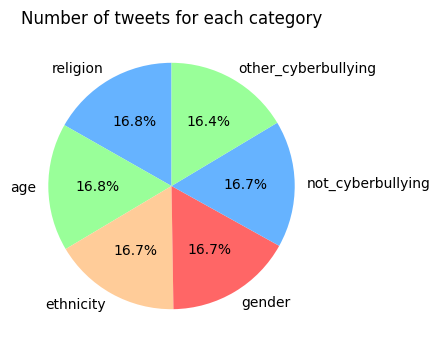

In [5]:
# Check distribution for cyberbullying category
category_counts = df['category'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff6666'])
plt.title('Number of tweets for each category')
plt.show()

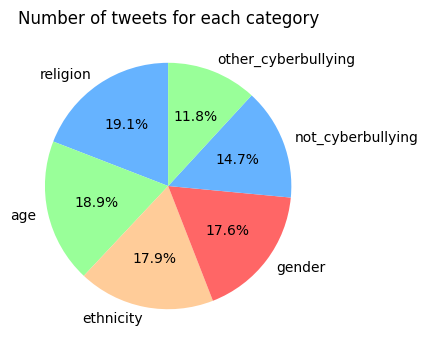

In [6]:
# Clean tweets using functions defined in src, and drop duplicates
# Define stop words for text cleaning
stop_words = set(stopwords.words('english'))
# Initialize lemmatizer for text cleaning
lemmatizer = WordNetLemmatizer()

df['clean_tweet'] = [clean_tweet(tweet, lemmatizer, stop_words) for tweet in df['tweet']]
df.drop_duplicates('clean_tweet', inplace=True)

category_counts = df['category'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff6666'])
plt.title('Number of tweets for each category')
plt.show()

# After cleaning we can see that category "other_cyberbullying" is reduced to around 12%, because it is too generic

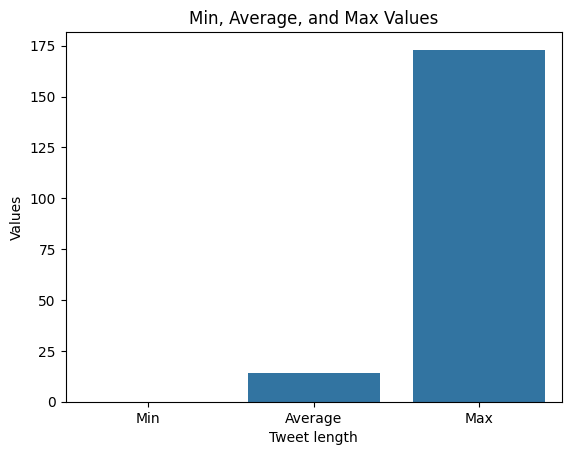

In [7]:
# Remove "other_cyberbullying category" due to its incosistency and being too generic
df = df[df['category'] != 'other_cyberbullying']

# Add columns for tweet length
df['tweet_length'] = [len(text.split()) for text in df.clean_tweet]
df.sort_values(by=['tweet_length'], ascending=False)

# Check minimum, average and maximum tweet length and show it
max_length = np.max(df['tweet_length'])
min_length = np.min(df['tweet_length'])
average_length = np.average(df['tweet_length'])

stats = {'Metric': ['Min', 'Average', 'Max'], 'Value': [min_length, average_length, max_length]}
stats_df = pd.DataFrame(stats)

sns.barplot(x='Metric', y='Value', data=stats_df)
plt.xlabel('Tweet length')
plt.ylabel('Values')
plt.title('Min, Average, and Max Values')
plt.show()

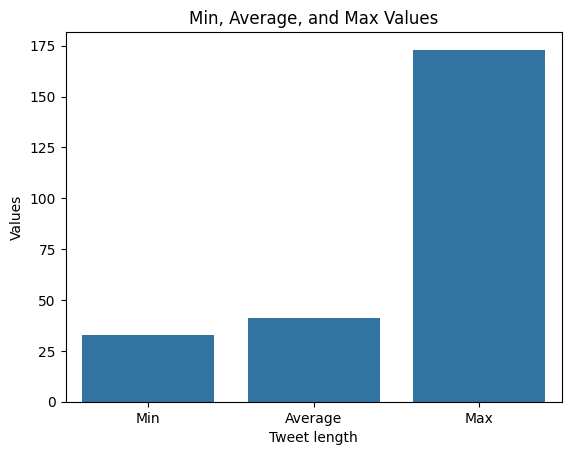

In [8]:
# Removing outliners
df = df[df['tweet_length'] < df['tweet_length'].quantile(0.995)]
df = df[df['tweet_length'] > 0]

# Check minimum, average and maximum tweet length and show it again
max_length = np.max(df['tweet_length'])
min_length = np.min(df['tweet_length'])
average_length = np.average(df['tweet_length'])

stats = {'Metric': ['Min', 'Average', 'Max'], 'Value': [min_length, average_length, max_length]}
stats_df = pd.DataFrame(stats)

sns.barplot(x='Metric', y='Value', data=stats_df)
plt.xlabel('Tweet length')
plt.ylabel('Values')
plt.title('Min, Average, and Max Values')
plt.show()

In [9]:
# Map each category to numeric value
category_label_mapping = {
    'religion': 0,
    'age': 1,
    'gender': 2,
    'ethnicity': 3,
    'not_cyberbullying': 4
}

df['category'] = df['category'].replace(category_label_mapping)

C:\Users\imal\AppData\Local\Temp\ipykernel_23528\3502798662.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['category'] = df['category'].replace(category_label_mapping)
